# Introduction to Dask Dataframe operations.

### Dask is a library you use in place of pandas that switches the functions to 
### one that can scale out and run in parallel.

### Documentation 
https://docs.dask.org/en/latest/install.html

#### Book on Dask - I like it but not as in-depth as I would like.

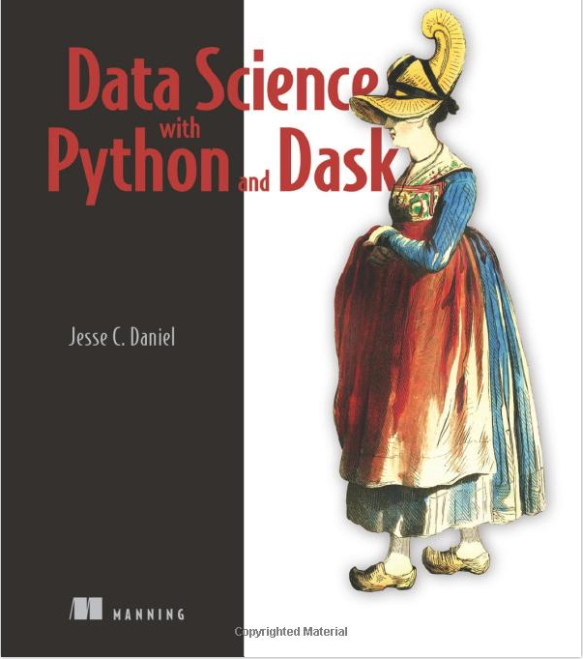

<div style="background-color:darkblue; text-align:left; vertical-align: top;">
<span style="color:white">
<h3>What is Dask? </h3><br>
    
- Dask is a flexible library for parallel computing in Python. <br>
- Dask dataframes do NOT need to fit into memory and Dask can work on a single machine or scale out to many machines. <br>
- Arguably, Dask fills the gap between pandas and Apache Spark.  When your data gets to large for pandas, often Dask can support it without going to Spark. <br>
- Very actively maintained!!! <br>
- Can work on local machine and scale up to Cloud when needed. <br>
 </span>
</div>

#### On a Single Machine, Will Dask Spill Data (page out) if needed?

Dask.dataframe loads data lazily and attempts to perform your entire computation in one linear scan through the dataset. Surprisingly, this is usually doable.

Intelligently dumping down to disk is also an option that it can manage, especially when shuffles are required, but generally there are ways around this.

https://stackoverflow.com/questions/36269461/how-do-dask-dataframes-handle-larger-than-memory-datasets

### Is Dask Similar to Koalas?

- Yes but Dask is 100% Python for Python developers and does not need Apache Spark.  
- Koalas is only for Apache Spark.

### What is NOT supported? 
- No definitive list but new features always being added.

#### **Lessons Learned:**
#### - When Dask returns results from Dask dataframe operations, it is as a pandas dataframe.
#### - Dask uses lazy excution by default and you need to force execution.
#### - Syntax changes are needed from some operations that seem very basic.

### Dask vs. Apache Spark
- Dask is much easier to initially set up and use. Clusters?  Yet to find out. 
- Dask is Python only.
- Dask is ideal for medium workloads esp. if you don't want to invest the time and effort of setting up and using Spark.
- Dask is general purpose whereas Apache Spark is more SQL and ETL focused.  
- Maybe best path is: pandas -> Dask -> Spark
- Cloud Only - Databricks may be the best option

### Some migration notes: 
- Be sure to change any pandas module prefix to the Dask, i.e. pd. to dd.
- Be careful to change all pandas dataframe names to the correct dask dataframe names!
- Syntax changes may be required.

### Installing Dask

If using Conda,
```python
conda install dask
```

or install with pip,
```python
python -m pip install "dask[complete]"
```

### Let's do the Arrrrgh Test!  Does it work?

### Code Example 01 - pandas - Load pandas and numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib notebook 

### Code Example 02 - Dask - Load dask modules.

In [6]:
import dask.dataframe as dd

### List files in the ..\Data folder that start with aw and have a csv file extension.  Notice I'm not using the magic command prefix.

In [7]:
ls

 �Ϻа� D �����ϺЬO Data
 �ϺаϧǸ�:  0E91-5604

 d:\Data-Visualization_practice ���ؿ�

2024/07/29  �U�� 01:47    <DIR>          .
2024/07/29  �U�� 01:39           494,811 Dask_Dataframes.ipynb
2024/07/24  �U�� 09:42    <DIR>          data
2024/07/29  �U�� 01:39        11,721,072 FactInternetSales.csv
2024/07/23  �W�� 10:34         1,360,155 googleplaystore.csv
2024/07/29  �U�� 01:39                13 jl.bat
2024/07/18  �W�� 12:21                70 matplotlib_start.py
2024/07/22  �W�� 11:02             4,147 NumPy_start.py
2024/07/23  �U�� 12:01             1,560 pandas_googleplaystore.py
2024/07/23  �W�� 10:36             3,307 pandas_start.py
2024/07/26  �U�� 09:12           325,213 plotly_3D.ipynb
2024/07/28  �U�� 09:14            80,375 plotly_3Dcurve.ipynb
2024/07/25  �U�� 03:37           112,661 plotly_iris.ipynb
2024/07/29  �W�� 08:46         1,302,295 plotly_map.ipynb
2024/07/24  �U�� 10:54           103,948 plotly_start.ipynb
              13 ���ɮ�      15,509,627 �줸��
             

## Comparing pandas to Dask.  Are they identical?

### Code Example 03 - Dask - Code Completion

In [8]:
dd.read_csv

<function dask_expr._collection.read_csv(path, *args, header='infer', usecols=None, dtype_backend=None, storage_options=None, **kwargs)>

### Code Example 04 - Dask - Getting Help

In [9]:
help(dd)

Help on package dask.dataframe in dask:

NAME
    dask.dataframe

PACKAGE CONTENTS
    _compat
    _dtypes
    _pyarrow
    _pyarrow_compat
    _testing
    accessor
    backends
    categorical
    core
    dispatch
    extensions
    groupby
    hyperloglog
    indexing
    io (package)
    methods
    multi
    numeric
    optimize
    partitionquantiles
    reshape
    rolling
    shuffle
    tests (package)
    tseries (package)
    utils

SUBMODULES
    demo

FUNCTIONS
    raise_not_implemented_error(attr_name)

DATA
    get_collection_type = <dask.utils.Dispatch object>

FILE
    c:\users\pinea\anaconda3\lib\site-packages\dask\dataframe\__init__.py




### Code Example 05 - Dask - Getting help on functions 

In [10]:
help(dd.read_csv)

Help on function read_csv in module dask_expr._collection:

read_csv(path, *args, header='infer', usecols=None, dtype_backend=None, storage_options=None, **kwargs)



###     Dataframes...

### Code Example 06 - pandas - Load a CSV file

In [11]:
pdf_sales = pd.read_csv('FactInternetSales.csv', nrows=2000)

### Code Example 07 - Dask - Load a CSV file using nrows

In [12]:
# Note:  nrows is not supported in Dask
ddf_sales = dd.read_csv('FactInternetSales.csv', nrows=2000)

ValueError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: The 'nrows' keyword is not supported by `dd.read_csv`. To achieve the same behavior, it's recommended to use `dd.read_csv(...).head(n=nrows)`

### Code Example 08 - Dask - Load a CSV file using head() and n=) to limit rows.

In [13]:
ddf_sales = dd.read_csv('FactInternetSales.csv').head(n=2000)

### Code Example 09 - Dask - Load a CSV file - all rows

In [14]:
ddf_sales = dd.read_csv('FactInternetSales.csv')

### Code Example 10 - Dask - Display a dataframe

In [15]:
ddf_sales

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,int64,int64,int64,string,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,string,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Code Example 11 - Dask - Use head() to force compute and show some rows.

In [16]:
ddf_sales.head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


### Code Example 12 - pandas - Load a CSV file - all rows

In [17]:
pdf_sales = pd.read_csv('FactInternetSales.csv')

### Code Example 13 - Dask - persist a dataframe to memory

#### A correction from the video.  You need to assign the result of persist to a new dataframe b/c Dask dataframes are immutable.

In [18]:
from dask import persist

ddf_sales = ddf_sales.persist()

### Code Example 15 - pandas - Display the object type

In [19]:
type(pdf_sales)

pandas.core.frame.DataFrame

### Code Example 16 - Dask - Display the object type

In [20]:
type(ddf_sales)

dask_expr._collection.DataFrame

### Code Example 17 - Dask - Display the column names and types

In [21]:
pdf_sales.dtypes.head(4)

ProductKey      int64
OrderDateKey    int64
DueDateKey      int64
ShipDateKey     int64
dtype: object

### Code Example 18 - Dask - Display the column names and types

In [22]:
ddf_sales.dtypes.head(4)

ProductKey      int64
OrderDateKey    int64
DueDateKey      int64
ShipDateKey     int64
dtype: object

## Statistical methods...

### Code Example 19 - pandas - Using the . syntax to reference columns...

In [23]:
pdf_sales.SalesAmount.describe()

count    60398.000000
mean       486.086911
std        928.489892
min          2.290000
25%          7.950000
50%         29.990000
75%        539.990000
max       3578.270000
Name: SalesAmount, dtype: float64

### Code Example 20 - Dask - Using the . syntax to reference columns...

In [24]:
ddf_sales.SalesAmount.describe()

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: describenumeric, 3 expressions
Expr=FromGraph(983efe6)['SalesAmount'].describenumeric(split_every=False)

### Code Example 21 - Dask - Using compute to force execution.

In [25]:
ddf_sales.SalesAmount.describe().compute()

count    60398.000000
mean       486.086911
std        928.489892
min          2.290000
25%          7.950000
50%         29.990000
75%        539.990000
max       3578.270000
Name: SalesAmount, dtype: float64

#### Dask compute is equal to the Spark action in that it will execute all pending transformations
#### and return the results as a <span style="color:blue"> **pandas dataframe**</span>.

### Code Example 22 - Dask - Using compute() on a dataframe

In [26]:
ddf_sales_stats = ddf_sales.SalesAmount.describe()
ddf_sales_stats.compute()

count    60398.000000
mean       486.086911
std        928.489892
min          2.290000
25%          7.950000
50%         29.990000
75%        539.990000
max       3578.270000
Name: SalesAmount, dtype: float64

### Code Example 23 - pandas - Getting the mean

In [27]:
pdf_sales.SalesAmount.mean()

486.0869105053147

### Code Example 24 - Dask - Getting the mean

In [29]:
ddf_avgsales = ddf_sales.SalesAmount.mean()
ddf_avgsales.compute()

486.0869105053147

### Code Example 25 - pandas - Accessing columns using the bracket sytax

In [30]:
pdf_sales['SalesAmount']

0        3578.2700
1        3399.9900
2        3399.9900
3         699.0982
4        3399.9900
           ...    
60393      21.9800
60394       8.9900
60395      21.9800
60396     159.0000
60397       8.9900
Name: SalesAmount, Length: 60398, dtype: float64

### Code Example 26- Dask - Accessing columns using the bracket syntax

In [30]:
ddf_sales['SalesAmount']

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: getitem, 2 expressions
Expr=FromGraph(983efe6)['SalesAmount']

### Code Example 27 - Dask - Print a dataframe column with compute().

In [31]:
ddf_sales['SalesAmount'].compute()

0        3578.2700
1        3399.9900
2        3399.9900
3         699.0982
4        3399.9900
           ...    
60393      21.9800
60394       8.9900
60395      21.9800
60396     159.0000
60397       8.9900
Name: SalesAmount, Length: 60398, dtype: float64

### Code Example 28 - pandas - Filtering

In [32]:
pdf_sales[pdf_sales['SalesAmount'] > 2000].head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


### Code Example 29 - Dask - Filtering

In [33]:
ddf_sales[ddf_sales['SalesAmount'] > 2000].head(3)  # Forces compute!

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


### Code Example 30 - Dask - Filtering with compute()

In [34]:
ddf_sales[ddf_sales['SalesAmount'] > 2000].compute().head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


### Code Example 31 - pandas - Slicing by rows and columns.

In [35]:
pdf_sales[0:3]['ProductKey']

0    310
1    346
2    346
Name: ProductKey, dtype: int64

### Code Example 32 - Dask - Slicing by rows and columns

In [36]:
ddf_sales[0:3]['ProductKey']

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

### Code Example 33 - Dask - Slicing by columns with all rows

In [38]:
ddf_sales[:]['ProductKey'].head(3)

0    310
1    346
2    346
Name: ProductKey, dtype: int64

### Code Example 34 - Dask - Slicing - all rows but selected columns

In [39]:
ddf_sales.iloc[:, 0:1].head(3)

,ProductKey
0,310
1,346
2,346


### Code Example 35 - pandas - Slicing using iloc by selected column numbers

In [40]:
pdf_sales.iloc[:,[1,2]].head(5)  # select by column number...

,OrderDateKey,DueDateKey
0,20101229,20110110
1,20101229,20110110
2,20101229,20110110
3,20101229,20110110
4,20101229,20110110


### Code Example 36 - Dask - Slicing using iloc by selected column numbers

In [37]:
ddf_sales.iloc[:,[1,2]].head(5)  # select by column number...

,OrderDateKey,DueDateKey
0,20101229,20110110
1,20101229,20110110
2,20101229,20110110
3,20101229,20110110
4,20101229,20110110


### Code Example 37- pandas - Slicing row ranges and column names

In [42]:
pdf_sales[1:5][['ProductKey', 'SalesAmount']]

,ProductKey,SalesAmount
1,346,3399.9900
2,346,3399.9900
3,336,699.0982
4,346,3399.9900


### Code Example 38- Dask - Slicing row ranges and column names - fails

In [43]:
ddf_sales[:][['ProductKey', 'SalesAmount']].head(5)

,ProductKey,SalesAmount
0,310,3578.2700
1,346,3399.9900
2,346,3399.9900
3,336,699.0982
4,346,3399.9900


### Code Example 39- Dask - Slicing row ranges and column names with compute

In [44]:
ddf_sales[:][['ProductKey', 'SalesAmount']].compute()

,ProductKey,SalesAmount
0,310,3578.2700
1,346,3399.9900
2,346,3399.9900
3,336,699.0982
4,346,3399.9900
...,...,...
60393,485,21.9800
60394,225,8.9900
60395,485,21.9800
60396,486,159.0000


### Code Example 40 - pandas - set_index

In [ ]:
pdf_sales = pdf_sales.set_index('SalesOrderNumber', drop=False)
pdf_sales.head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
SalesOrderNumber,,,,,,,,,,,,,,,,,,,,,
SO43697,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
SO43698,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
SO43699,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


#### Code Example 41 - Dask - set_index

In [ ]:
ddf_sales = ddf_sales.set_index('SalesOrderNumber', drop=False)
ddf_sales.head(3)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
SalesOrderNumber,,,,,,,,,,,,,,,,,,,,,
SO43697,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,2171.2942,3578.27,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
SO43698,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
SO43699,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


## What about plotting?

<div style="background-color:darkblue; text-align:left; vertical-align: top;">
<span style="color:white">
    <h2>Take-A-Ways</h2>
    
### - pandas syntax vs Dask had mixed results!
### - Some code must be rethought.
### - Name your dataframes so you can tell which is pandas and which is Dask.
</span>
</div>

<div style="background-color:darkblue; text-align:left; vertical-align: top;">
<span style="color:white">

## <h1 align="center">Thank You!</h1>  

### <h3 align="center">Please like, share, subscribe, and support me on Patreon.<br>  Link in the description.</h3> 
</span>
</div>